<a href="https://colab.research.google.com/github/ludwigwittgenstein2/Research/blob/master/Participant_Communication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
!pip install sklearn
!pip install nltk
!nltk.download('punkt_tab')

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
/bin/bash: -c: line 1: syntax error near unexpected token `'punkt_tab''
/bin/bash: -c: line 1: `nltk.download('punkt_tab')'


In [ ]:
#Pyschological Safety

ValueError: Could not interpret value `Psychological Safety Level` for `x`. An entry with this name does not appear in `data`.

<Figure size 1400x700 with 0 Axes>

In [ ]:
#Participant Dataset

In [15]:
print(df.columns.tolist())

['Average of Milestone Level', 'Column Labels', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7']


                                            Category  2019  2020  2021  2022  \
0                                              ICS-1  1.82  2.18  3.11  3.12   
1  Osteopathic Principles for Interpersonal and C...  1.82  2.18  3.11  2.75   
2                   Patient and Family Communication  1.82  2.18  3.11  2.87   
3  Patient and Family-Centered Communication (AP/CP)  1.82  1.68  2.09  2.34   
4         Patient- and Family-Centered Communication  1.82  2.86  3.33  3.24   

   2023  2024  
0  3.32  3.03  
1  2.80  2.82  
2  2.94  2.99  
3  2.48  2.39  
4  3.41  3.17  


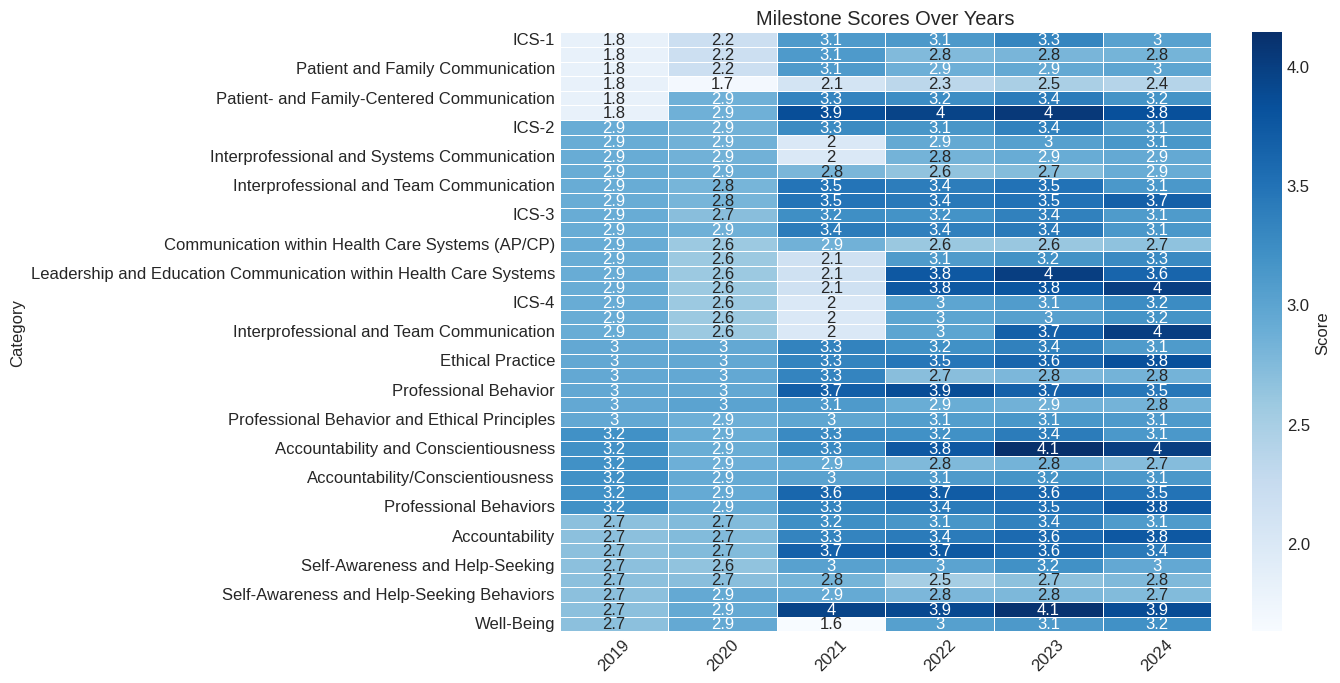

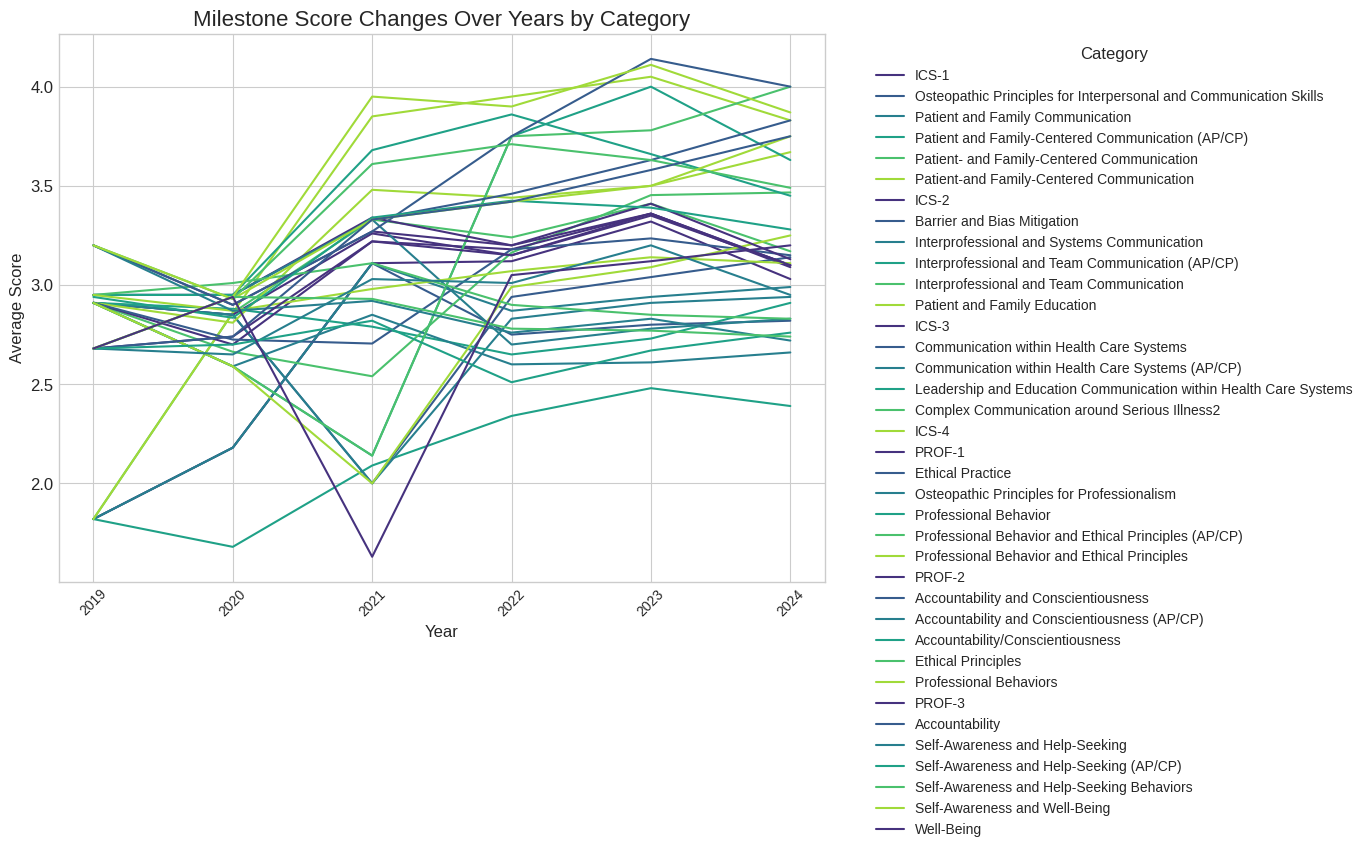

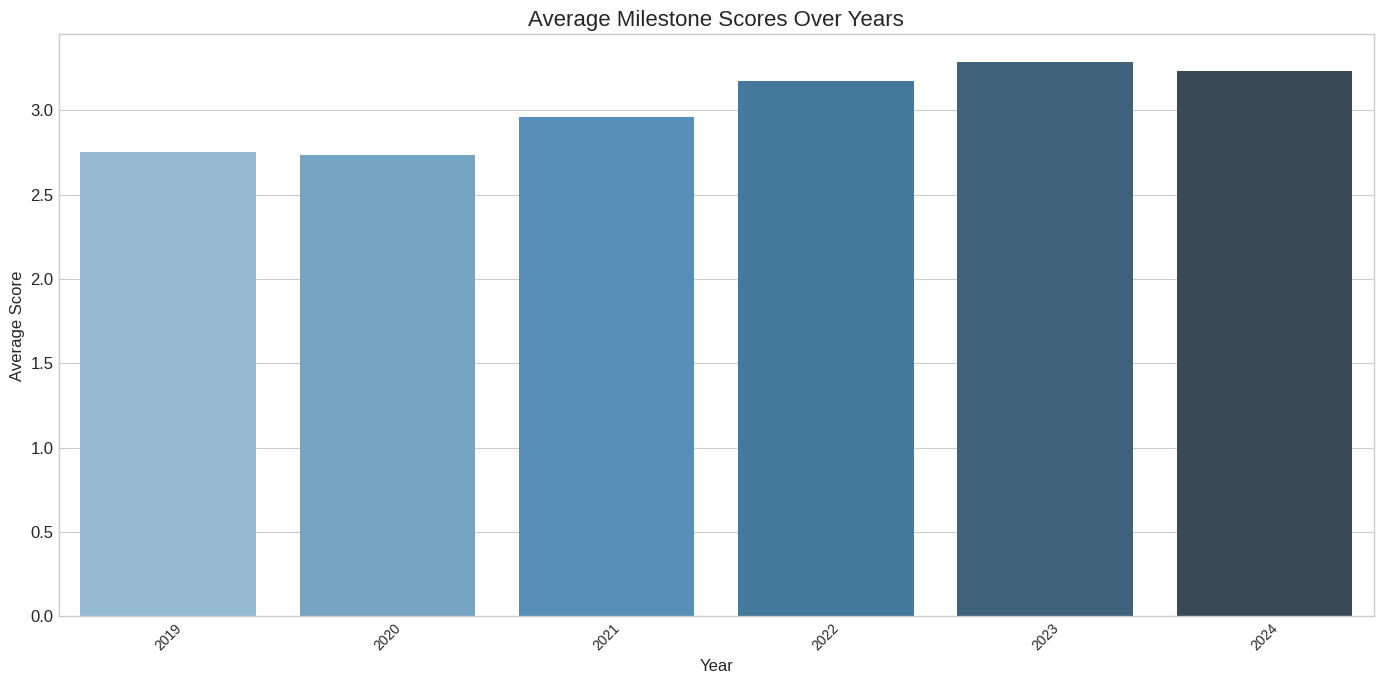

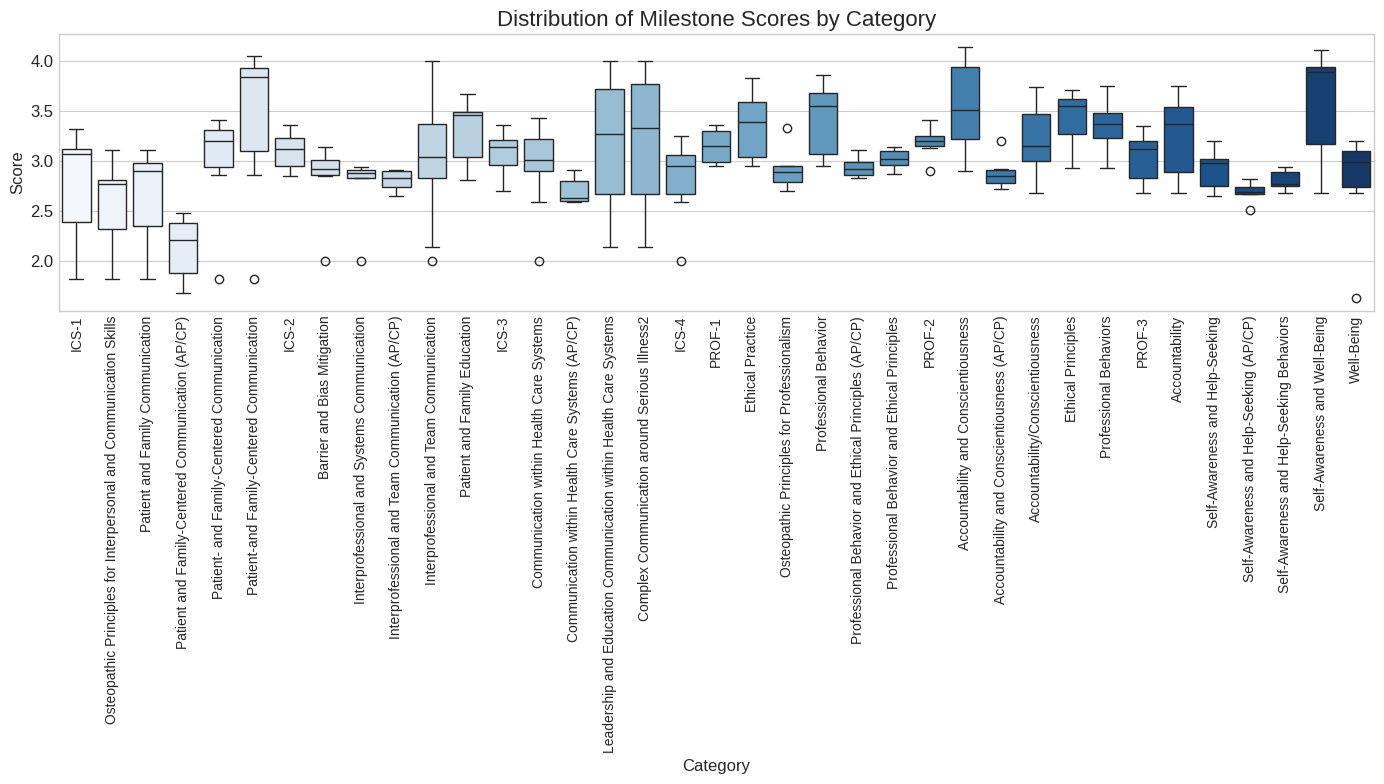

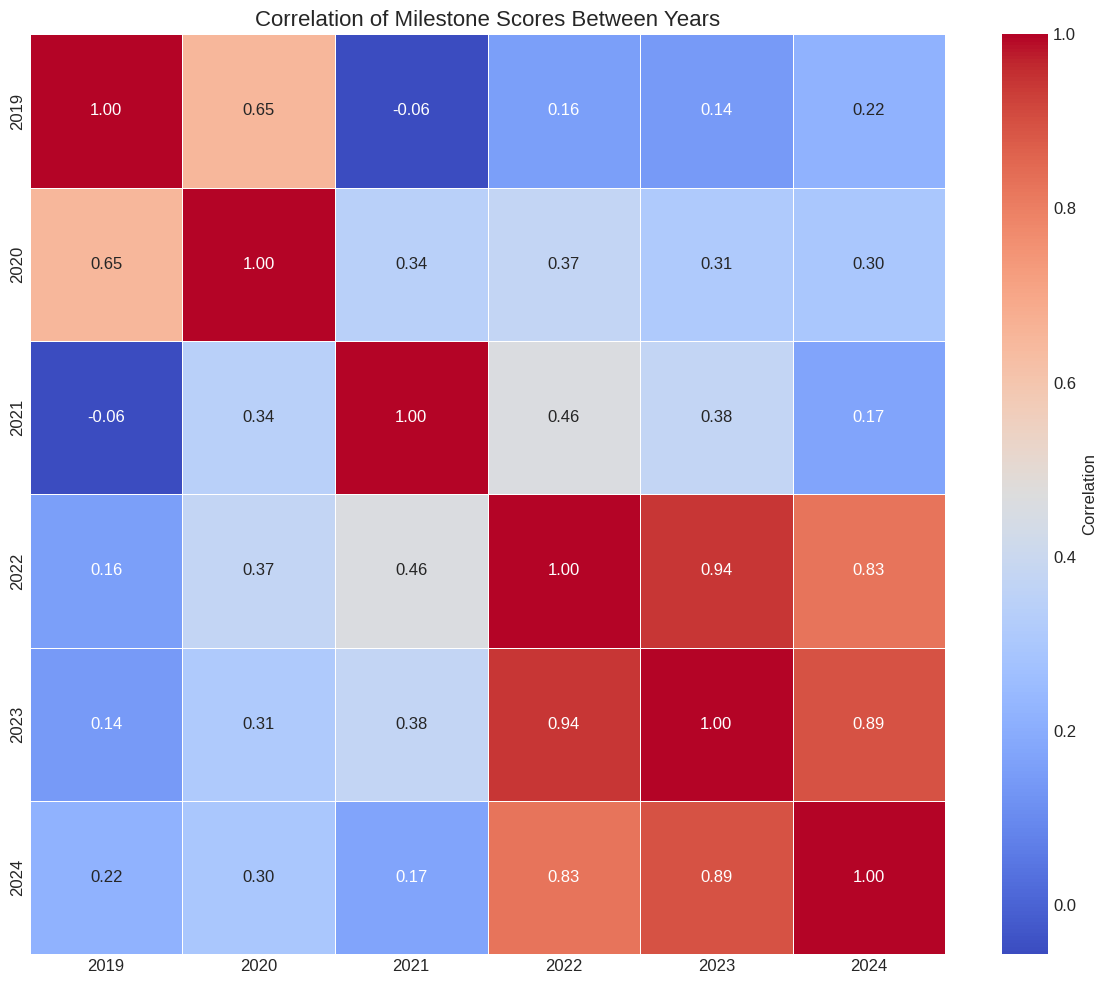

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file, skipping metadata rows, and set the correct header row
file_path = "milestone.csv"
df = pd.read_csv(file_path, skiprows=3)

# Rename the first column to 'Category' and remove spaces from column names
df.rename(columns={df.columns[0]: 'Category'}, inplace=True)
df.columns = df.columns.str.strip()

# Identify columns that represent years (numeric columns)
year_columns = [col for col in df.columns if col.isdigit()]

# Forward-fill missing values in the 'Category' column
df['Category'] = df['Category'].fillna(method='ffill')

# Convert year columns to numeric, coercing errors to NaN
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')

# Remove rows where 'Category' contains "Grand Total"
df = df[~df['Category'].str.contains("Grand Total", na=False)]

# Drop the 'Grand Total' column if it exists
df.drop(columns=['Grand Total'], errors='ignore', inplace=True)

# Handle missing data - Option 1: Forward fill or fill with 0s (depending on your needs)
df[year_columns] = df[year_columns].fillna(method='ffill', axis=0)

# Debug: Print the first few rows of the processed dataframe
print(df.head())

# Create a heatmap visualization
plt.figure(figsize=(14, 7))
heatmap_data = df.set_index('Category')[year_columns]
sns.heatmap(heatmap_data, annot=True, cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Score'})

plt.title('Milestone Scores Over Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional charts for exploration

# 1. Line Plot: Show changes over years for each category
plt.figure(figsize=(14, 8))
for category in df['Category'].unique():
    sns.lineplot(x=year_columns, y=df[df['Category'] == category][year_columns].mean(), label=category)

plt.title('Milestone Score Changes Over Years by Category', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# 2. Bar Plot: Average scores per year across all categories
avg_scores = df[year_columns].mean()
plt.figure(figsize=(14, 7))
sns.barplot(x=year_columns, y=avg_scores, palette='Blues_d')

plt.title('Average Milestone Scores Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# 3. Box Plot: Distribution of scores across categories for each year
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='value', data=pd.melt(df[['Category'] + year_columns], id_vars='Category'), palette='Blues')

plt.title('Distribution of Milestone Scores by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

# 4. Heatmap: Correlation matrix between year columns
corr = df[year_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar_kws={'label': 'Correlation'})

plt.title('Correlation of Milestone Scores Between Years', fontsize=16)
plt.tight_layout()
plt.show()


                                            Category  2019  2020  2021  2022  \
0                                              ICS-1  1.82  2.18  3.11  3.12   
1  Osteopathic Principles for Interpersonal and C...   NaN   NaN   NaN  2.75   
2                   Patient and Family Communication   NaN   NaN   NaN  2.87   
3  Patient and Family-Centered Communication (AP/CP)  1.82  1.68  2.09  2.34   
4         Patient- and Family-Centered Communication   NaN  2.86  3.33  3.24   

   2023  2024  
0  3.32  3.03  
1  2.80  2.82  
2  2.94  2.99  
3  2.48  2.39  
4  3.41  3.17  


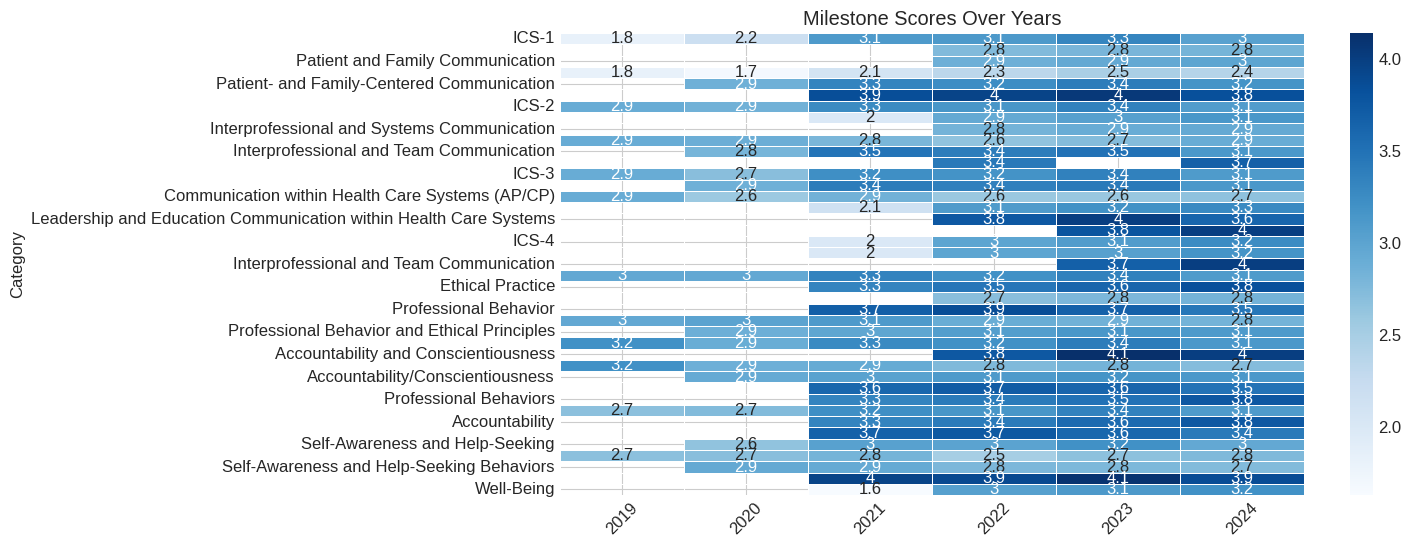

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file, skipping metadata rows, and set the correct header row
file_path = "milestone.csv"
df = pd.read_csv(file_path, skiprows=3)

# Rename the first column to 'Category' and remove spaces from column names
df.rename(columns={df.columns[0]: 'Category'}, inplace=True)
df.columns = df.columns.str.strip()

# Identify columns that represent years (numeric columns)
year_columns = [col for col in df.columns if col.isdigit()]

# Forward-fill missing values in the 'Category' column
df['Category'] = df['Category'].fillna(method='ffill')

# Convert year columns to numeric, coercing errors to NaN
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')

# Remove rows where 'Category' contains "Grand Total"
df = df[~df['Category'].str.contains("Grand Total", na=False)]

# Drop the 'Grand Total' column if it exists
df.drop(columns=['Grand Total'], errors='ignore', inplace=True)

# Debug: Print the first few rows of the processed dataframe
print(df.head())

# Create a heatmap visualization
plt.figure(figsize=(12, 6))
heatmap_data = df.set_index('Category')[year_columns]
sns.heatmap(heatmap_data, annot=True, cmap='Blues', linewidths=0.5)

plt.title('Milestone Scores Over Years')
plt.xticks(rotation=45)
plt.show()


                                            Category  2019  2020  2021  2022  \
0                                              ICS-1  1.82  2.18  3.11  3.12   
1  Osteopathic Principles for Interpersonal and C...   NaN   NaN   NaN  2.75   
2                   Patient and Family Communication   NaN   NaN   NaN  2.87   
3  Patient and Family-Centered Communication (AP/CP)  1.82  1.68  2.09  2.34   
4         Patient- and Family-Centered Communication   NaN  2.86  3.33  3.24   

   2023  2024  
0  3.32  3.03  
1  2.80  2.82  
2  2.94  2.99  
3  2.48  2.39  
4  3.41  3.17  


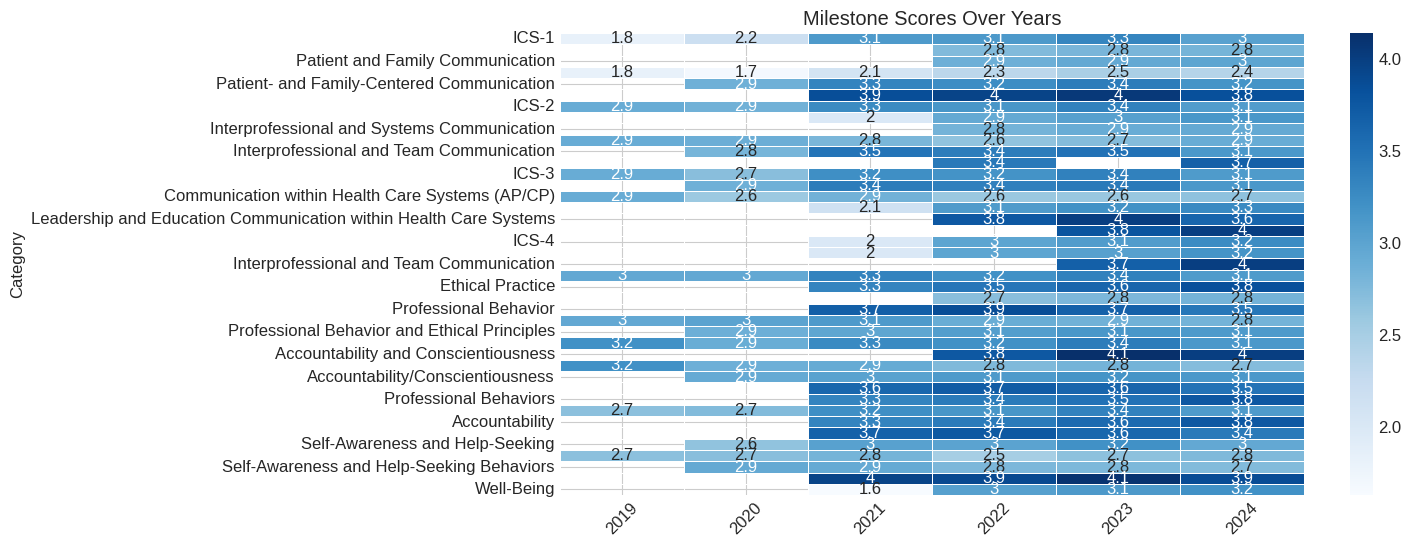

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV and set correct headers
file_path = "milestone.csv"

# Skip metadata rows and use correct header row
df = pd.read_csv(file_path, skiprows=3)

# Rename the first column to 'Category'
df.rename(columns={df.columns[0]: 'Category'}, inplace=True)

# Remove spaces from column names
df.columns = df.columns.str.strip()

# Identify columns that are years (numeric)
year_columns = [col for col in df.columns if col.isdigit()]

# Forward-fill missing categories
df['Category'] = df['Category'].fillna(method='ffill')

# Convert year columns to numeric
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')

# Remove "Grand Total" rows
df = df[~df['Category'].str.contains("Grand Total", na=False)]

# Remove "Grand Total" column if it exists
df = df.drop(columns=['Grand Total'], errors='ignore')

# Debugging: Print processed data
print(df.head())

# Heatmap visualization
plt.figure(figsize=(12, 6))
heatmap_data = df.set_index('Category')[year_columns]
sns.heatmap(heatmap_data, annot=True, cmap='Blues', linewidths=0.5)

plt.title('Milestone Scores Over Years')
plt.xticks(rotation=45)
plt.show()


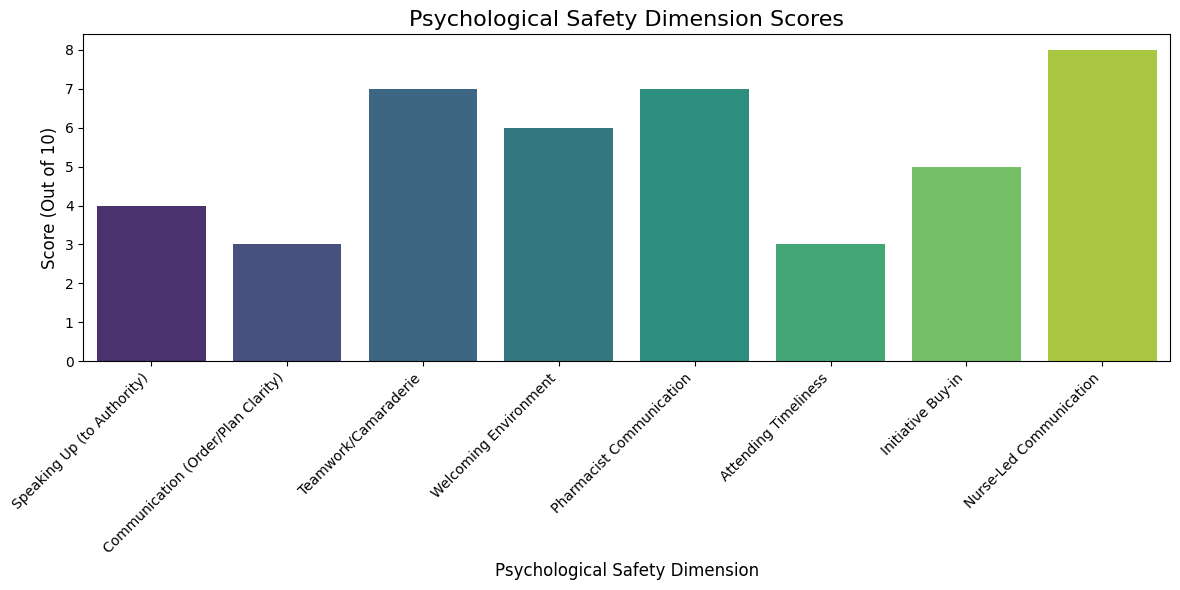

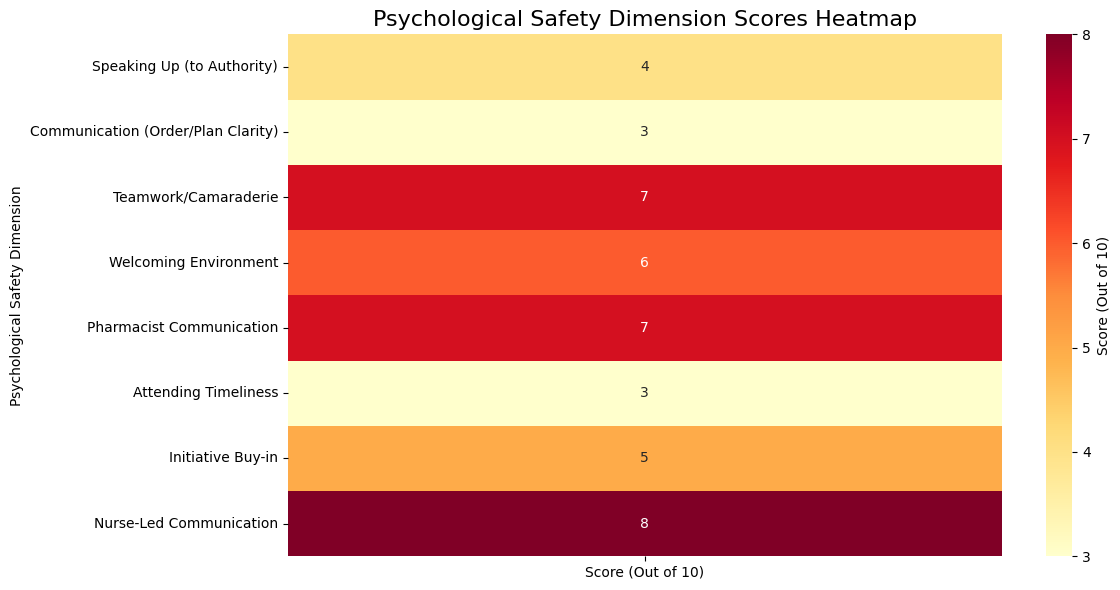

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Create the DataFrame directly
data = {
    'Psychological Safety Dimension': [
        'Speaking Up (to Authority)', 'Communication (Order/Plan Clarity)',
        'Teamwork/Camaraderie', 'Welcoming Environment', 'Pharmacist Communication',
        'Attending Timeliness', 'Initiative Buy-in', 'Nurse-Led Communication'
    ],
    'Score (Out of 10)': [4, 3, 7, 6, 7, 3, 5, 8]
}

df = pd.DataFrame(data)

# Seaborn Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Psychological Safety Dimension', y='Score (Out of 10)', data=df, palette='viridis')
plt.title('Psychological Safety Dimension Scores', fontsize=16)
plt.xlabel('Psychological Safety Dimension', fontsize=12)
plt.ylabel('Score (Out of 10)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Seaborn Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.set_index('Psychological Safety Dimension'), annot=True, cmap='YlOrRd', cbar_kws={'label': 'Score (Out of 10)'})
plt.title('Psychological Safety Dimension Scores Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

# Plotly Interactive Bar Chart
fig = px.bar(df, x='Psychological Safety Dimension', y='Score (Out of 10)',
             title='Interactive Psychological Safety Dimension Scores',
             color='Score (Out of 10)', color_continuous_scale='viridis')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Plotly Interactive Pie Chart
fig = px.pie(df, values='Score (Out of 10)', names='Psychological Safety Dimension',
             title='Proportion of Scores Across Psychological Safety Dimensions',
             color_discrete_sequence=px.colors.sequential.Viridis)
fig.show()


In [ ]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.7 MB/s eta 0:00:00


In [5]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
import nltk

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy.special import softmax
from nltk.tokenize import sent_tokenize
import warnings
import os
from tqdm import tqdm
import nltk
import logging
import time
import random

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

warnings.filterwarnings('ignore')

class EmotionAnalyzer:
    def __init__(self, model_name="joeddav/distilbert-base-uncased-go-emotions-student"):
        """
        Initialize emotion analyzer with Plutchik's primary emotions.
        Loads the specified emotion detection model.
        """
        self.model_name = model_name
        self.emotion_colors = {
            'anger': '#DC143C',
            'anticipation': '#FFA500',
            'joy': '#FFD700',
            'trust': '#90EE90',
            'fear': '#008000',
            'surprise': '#87CEEB',
            'sadness': '#0000FF',
            'disgust': '#800080'
        }
        self.primary_emotions = list(self.emotion_colors.keys())
        self.emotion_mapping = {
            'anger': 'anger', 'annoyance': 'anger', 'disapproval': 'anger',
            'curiosity': 'anticipation', 'excitement': 'anticipation', 'interest': 'anticipation',
            'joy': 'joy', 'amusement': 'joy', 'approval': 'joy', 'gratitude': 'joy', 'love': 'joy',
            'optimism': 'joy', 'pride': 'joy',
            'admiration': 'trust', 'caring': 'trust', 'desire': 'trust', 'relief': 'trust',
            'fear': 'fear', 'nervousness': 'fear',
            'surprise': 'surprise', 'realization': 'surprise', 'confusion': 'surprise',
            'sadness': 'sadness', 'disappointment': 'sadness', 'grief': 'sadness', 'remorse': 'sadness',
            'disgust': 'disgust', 'embarrassment': 'disgust'
        }
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.emotion_tokenizer = None
        self.emotion_model = None
        self.load_model()
        self.reset_results()
        logging.info(f"Models loaded successfully. Using device: {self.device}")

    def load_model(self):
        """Loads the tokenizer and model, and moves the model to the specified device."""
        logging.info(f"Loading model: {self.model_name}")
        self.emotion_tokenizer = AutoTokenizer.from_pretrained(self.model_name)
        self.emotion_model = AutoModelForSequenceClassification.from_pretrained(self.model_name)
        self.emotion_model.to(self.device)
        logging.info(f"Model {self.model_name} loaded and moved to {self.device}")

    def reset_results(self):
        """Reset analysis results storage."""
        self.results = {'sentences': [], 'emotions': [], 'dominant_emotions': []}

    def read_file(self, file_path, encoding='utf-8'):
        """Read text from file with specified encoding and error handling."""
        try:
            logging.info(f"Reading file: {file_path} with encoding {encoding}")
            with open(file_path, 'r', encoding=encoding) as file:
                text = file.read()
            logging.info(f"Successfully read {len(text)} characters from {file_path}")
            return text
        except FileNotFoundError:
            logging.error(f"File not found: {file_path}")
            raise
        except UnicodeDecodeError:
            logging.error(f"UnicodeDecodeError occurred while reading {file_path}. Trying 'latin-1' encoding.")
            try:
                with open(file_path, 'r', encoding='latin-1') as file:
                    text = file.read()
                logging.info(f"Successfully read {len(text)} characters from {file_path} with 'latin-1' encoding.")
                return text
            except Exception as e:
                logging.error(f"Failed to read {file_path} with 'latin-1' encoding: {e}")
                raise
        except Exception as e:
            logging.error(f"An error occurred while reading {file_path}: {e}")
            raise

    def _get_emotion_scores(self, text):
        """Get raw emotion scores from the model."""
        inputs = self.emotion_tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        inputs = {k: v.to(self.device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = self.emotion_model(**inputs)
        scores = softmax(outputs.logits.cpu().numpy(), axis=1)[0]
        emotions = self.emotion_model.config.id2label
        return {emotions[i]: float(score) for i, score in enumerate(scores)}

    def _map_to_primary_emotions(self, emotion_scores):
        """Map detailed emotions to Plutchik's primary emotions."""
        primary_scores = {emotion: 0.0 for emotion in self.primary_emotions}
        for emotion, score in emotion_scores.items():
            if emotion in self.emotion_mapping:
                primary_emotion = self.emotion_mapping[emotion]
                primary_scores[primary_emotion] += score
        total = sum(primary_scores.values())
        if total > 0:
            primary_scores = {k: v / total for k, v in primary_scores.items()}
        return primary_scores

    def analyze_text(self, text):
        """Analyze emotions in text using sentence-level analysis."""
        sentences = sent_tokenize(text)
        logging.info(f"Total sentences to analyze: {len(sentences)}")
        for sentence in tqdm(sentences, desc="Analyzing sentences"):
            if sentence.strip():
                emotion_scores = self._get_emotion_scores(sentence)
                primary_scores = self._map_to_primary_emotions(emotion_scores)
                self.results['sentences'].append(sentence)
                self.results['emotions'].append(primary_scores)
                top_emotions = sorted(primary_scores.items(), key=lambda x: x[1], reverse=True)[:3]
                self.results['dominant_emotions'].append(dict(top_emotions))

    def visualize_results(self, filename=""):
        """Create emotion wheel and bar chart visualizations."""
        if not self.results['emotions']:
            logging.warning("No analysis results available. Please run analyze_text first.")
            return

        emotion_avg = pd.DataFrame(self.results['emotions']).mean()

        # 1. Emotion Wheel
        fig1 = go.Figure()
        for i, emotion in enumerate(self.primary_emotions):
            next_emotion = self.primary_emotions[(i + 1) % len(self.primary_emotions)]
            theta = [emotion, next_emotion, None]
            r = [emotion_avg[emotion], emotion_avg[next_emotion], None]
            fig1.add_trace(go.Scatterpolar(
                r=r, theta=theta, mode='lines', fill='tonext',
                fillcolor=f'rgba{tuple(list(px.colors.hex_to_rgb(self.emotion_colors[emotion])) + [0.6])}',
                line=dict(color=self.emotion_colors[emotion], width=2), name=emotion.capitalize()
            ))

        fig1.update_layout(
            polar=dict(radialaxis=dict(visible=True, range=[0, max(emotion_avg) * 1.1]),
                       angularaxis=dict(direction="clockwise", period=8)),
            showlegend=True,
            title=f"Plutchik's Wheel of Emotions Analysis - {filename}",
            height=800,
            # Add margin to the right side to make space for the full legend
            margin=dict(r=150)
        )
        fig1.show()

        # 2. Bar Chart
        fig2 = go.Figure(data=[go.Bar(
            x=list(self.primary_emotions),
            y=[emotion_avg[emotion] for emotion in self.primary_emotions],
            marker_color=[self.emotion_colors[emotion] for emotion in self.emotion_colors]
        )])

        fig2.update_layout(
            title=f"Emotion Intensity Distribution - {filename}",
            xaxis_title="Emotion", yaxis_title="Intensity Score", height=500
        )
        fig2.show()

    def get_summary(self):
        """Generate analysis summary with statistics."""
        if not self.results['emotions']:
            logging.warning("No analysis results available. Please run analyze_text first.")
            return "No analysis results available. Please run analyze_text first."

        emotion_averages = pd.DataFrame(self.results['emotions']).mean().sort_values(ascending=False)
        return {
            'document_summary': {
                'num_sentences': len(self.results['sentences']),
                'dominant_emotions': dict(emotion_averages.round(3)),
                'emotional_intensity': emotion_averages.sum()
            }
        }

def main():
    """Main function to analyze multiple text files."""
    file_paths = [
        '/content/2019MICU.csv',
        '/content/2020MICU.csv',
        '/content/2021MICU.csv'
    ]

    analyzer = EmotionAnalyzer()

    for file_path in file_paths:
        logging.info(f"Starting analysis for file: {file_path}")
        try:
            text = analyzer.read_file(file_path)
            analyzer.analyze_text(text)

            logging.info("Generating visualizations...")
            analyzer.visualize_results(filename=os.path.basename(file_path))

            summary = analyzer.get_summary()
            print("\nAnalysis Summary:")
            print(f"Number of sentences analyzed: {summary['document_summary']['num_sentences']}")
            print("\nDominant Emotions in Document:")
            for emotion, score in summary['document_summary']['dominant_emotions'].items():
                print(f"{emotion}: {score:.3f}")

            analyzer.reset_results() # Reset results for next file

        except FileNotFoundError as e:
            logging.error(f"File not found: {e}")
        except Exception as e:
            logging.exception(f"An error occurred during analysis of {file_path}: {e}")

if __name__ == "__main__":
    main()


Analyzing sentences: 100%|██████████| 268/268 [00:30<00:00,  8.90it/s]



Analysis Summary:
Number of sentences analyzed: 268

Dominant Emotions in Document:
trust: 0.296
surprise: 0.191
joy: 0.177
anticipation: 0.099
sadness: 0.082
anger: 0.077
fear: 0.042
disgust: 0.036


Analyzing sentences: 100%|██████████| 39/39 [00:03<00:00, 10.05it/s]


ERROR:root:UnicodeDecodeError occurred while reading /content/2021MICU.csv. Trying 'latin-1' encoding.



Analysis Summary:
Number of sentences analyzed: 39

Dominant Emotions in Document:
trust: 0.318
joy: 0.170
surprise: 0.150
anticipation: 0.126
anger: 0.082
sadness: 0.077
fear: 0.042
disgust: 0.035


Analyzing sentences: 100%|██████████| 40/40 [00:03<00:00, 10.24it/s]



Analysis Summary:
Number of sentences analyzed: 40

Dominant Emotions in Document:
trust: 0.311
joy: 0.186
surprise: 0.169
anticipation: 0.119
sadness: 0.085
anger: 0.065
fear: 0.033
disgust: 0.032


In [ ]:
#Three Files together

In [ ]:
#Three files together
#Average

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy.special import softmax
from nltk.tokenize import sent_tokenize
import warnings
import os
from tqdm import tqdm
import nltk  # Import nltk
import logging  # Import logging
import time  # Import time for sleep
import random  # Import random for jitter

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

warnings.filterwarnings('ignore')

class EmotionAnalyzer:
    def __init__(self):
        """Initialize emotion analyzer with Plutchik's primary emotions."""
        # Define primary emotions and their colors
        self.emotion_colors = {
            'anger': '#DC143C',      # Crimson Red
            'anticipation': '#FFA500', # Orange
            'joy': '#FFD700',        # Golden Yellow
            'trust': '#90EE90',      # Light Green
            'fear': '#008000',       # Dark Green
            'surprise': '#87CEEB',    # Sky Blue
            'sadness': '#0000FF',    # Blue
            'disgust': '#800080'     # Purple
        }

        self.primary_emotions = list(self.emotion_colors.keys())

        # Download NLTK resources if needed
        try:
            nltk.data.find('tokenizers/punkt')
        except LookupError:
            nltk.download('punkt', quiet=True)

        print("Loading models (this may take a few moments)...")

        # Initialize emotion detection model
        self.emotion_name = "joeddav/distilbert-base-uncased-go-emotions-student"
        self.emotion_tokenizer = AutoTokenizer.from_pretrained(self.emotion_name)
        self.emotion_model = AutoModelForSequenceClassification.from_pretrained(self.emotion_name)

        # Map model's emotions to Plutchik's primary emotions
        self.emotion_mapping = {
            # Anger cluster
            'anger': 'anger',
            'annoyance': 'anger',
            'disapproval': 'anger',

            # Anticipation cluster
            'curiosity': 'anticipation',
            'excitement': 'anticipation',
            'interest': 'anticipation',

            # Joy cluster
            'joy': 'joy',
            'amusement': 'joy',
            'approval': 'joy',
            'gratitude': 'joy',
            'love': 'joy',
            'optimism': 'joy',
            'pride': 'joy',

            # Trust cluster
            'admiration': 'trust',
            'caring': 'trust',
            'desire': 'trust',
            'relief': 'trust',

            # Fear cluster
            'fear': 'fear',
            'nervousness': 'fear',

            # Surprise cluster
            'surprise': 'surprise',
            'realization': 'surprise',
            'confusion': 'surprise',

            # Sadness cluster
            'sadness': 'sadness',
            'disappointment': 'sadness',
            'grief': 'sadness',
            'remorse': 'sadness',

            # Disgust cluster
            'disgust': 'disgust',
            'embarrassment': 'disgust'  # Map embarrassment to disgust
        }

        # Set up device (GPU if available)
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.emotion_model.to(self.device)

        self.reset_results()
        print(f"Models loaded successfully. Using device: {self.device}")

    def reset_results(self):
        """Reset analysis results storage."""
        self.results = {
            'sentences': [],
            'emotions': [],
            'dominant_emotions': []
        }

    def read_file(self, file_path):
        """Read text from file with proper error handling."""
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"File not found: {file_path}")

        print(f"Reading file: {file_path}")
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()

        print(f"Successfully read {len(text)} characters")
        return text

    def _get_emotion_scores(self, text):
        """Get raw emotion scores from the model."""
        inputs = self.emotion_tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        inputs = {k: v.to(self.device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = self.emotion_model(**inputs)

        scores = softmax(outputs.logits.cpu().numpy(), axis=1)[0]
        emotions = self.emotion_model.config.id2label
        return {emotions[i]: float(score) for i, score in enumerate(scores)}

    def _map_to_primary_emotions(self, emotion_scores):
        """Map detailed emotions to Plutchik's primary emotions."""
        primary_scores = {emotion: 0.0 for emotion in self.primary_emotions}

        for emotion, score in emotion_scores.items():
            if emotion in self.emotion_mapping:
                primary_emotion = self.emotion_mapping[emotion]
                primary_scores[primary_emotion] += score

        # Normalize scores
        total = sum(primary_scores.values())
        if total > 0:
            primary_scores = {k: v/total for k, v in primary_scores.items()}

        return primary_scores

    def analyze_text(self, text):
        """Analyze emotions in text using sentence-level analysis."""
        sentences = sent_tokenize(text)
        print(f"Total sentences to analyze: {len(sentences)}")

        for sentence in tqdm(sentences, desc="Analyzing sentences"):
            if sentence.strip():
                # Get and map emotion scores
                emotion_scores = self._get_emotion_scores(sentence)
                primary_scores = self._map_to_primary_emotions(emotion_scores)

                # Store results
                self.results['sentences'].append(sentence)
                self.results['emotions'].append(primary_scores)

                # Get top 3 emotions for this sentence
                top_emotions = sorted(primary_scores.items(), key=lambda x: x[1], reverse=True)[:3]
                self.results['dominant_emotions'].append(dict(top_emotions))

    def visualize_results(self, filename=""):
        """Create emotion wheel and bar chart visualizations."""
        if not self.results['emotions']:
            print("No analysis results available. Please run analyze_text first.")
            return

        # Calculate average emotions
        emotion_avg = pd.DataFrame(self.results['emotions']).mean()

        # 1. Emotion Wheel
        fig1 = go.Figure()

        for i, emotion in enumerate(self.primary_emotions):
            # Create segment points
            next_emotion = self.primary_emotions[(i + 1) % len(self.primary_emotions)]
            theta = [emotion, next_emotion, None]
            r = [emotion_avg[emotion], emotion_avg[next_emotion], None]

            # Add segment to wheel
            fig1.add_trace(go.Scatterpolar(
                r=r,
                theta=theta,
                mode='lines',
                fill='tonext',
                fillcolor=f'rgba{tuple(list(px.colors.hex_to_rgb(self.emotion_colors[emotion])) + [0.6])}',
                line=dict(color=self.emotion_colors[emotion], width=2),
                name=emotion.capitalize()
            ))

        fig1.update_layout(
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[0, max(emotion_avg) * 1.1]
                ),
                angularaxis=dict(
                    direction="clockwise",
                    period=8
                )
            ),
            showlegend=True,
            title=f"Plutchik's Wheel of Emotions Analysis - {filename}",
            height=800
        )
        fig1.show()

        # 2. Bar Chart
        fig2 = go.Figure(data=[
            go.Bar(
                x=list(self.primary_emotions),
                y=[emotion_avg[emotion] for emotion in self.primary_emotions],
                marker_color=[self.emotion_colors[emotion] for emotion in self.emotion_colors]
            )
        ])

        fig2.update_layout(
            title=f"Emotion Intensity Distribution - {filename}",
            xaxis_title="Emotion",
            yaxis_title="Intensity Score",
            height=500
        )
        fig2.show()

    def get_summary(self):
        """Generate analysis summary with statistics."""
        if not self.results['emotions']:
            return "No analysis results available. Please run analyze_text first."

        emotion_averages = pd.DataFrame(self.results['emotions']).mean().sort_values(ascending=False)

        return {
            'document_summary': {
                'num_sentences': len(self.results['sentences']),
                'dominant_emotions': dict(emotion_averages.round(3)),
                'emotional_intensity': emotion_averages.sum()
            }
        }

def load_model_with_retry(model_name, max_retries=5, initial_delay=2):
    """Load a model with retry mechanism."""
    for attempt in range(max_retries):
        try:
            tokenizer = AutoTokenizer.from_pretrained(model_name)
            model = AutoModelForSequenceClassification.from_pretrained(model_name)
            return tokenizer, model  # Return both tokenizer and model
        except Exception as e:
            logging.warning(f"Attempt {attempt + 1} failed to load model: {e}")
            if attempt == max_retries - 1:
                logging.error(f"Max retries reached. Could not load model {model_name}.")
                raise  # Re-raise the exception
            delay = initial_delay * (2 ** attempt) + random.random()  # Exponential backoff with jitter
            logging.info(f"Waiting {delay:.2f} seconds before retrying...")
            time.sleep(delay)
    return None, None  # Should not reach here if max_retries > 0

def main():
    """Main function to analyze multiple text files."""
    file_paths = [
        '/content/merged.txt',
        '/content/merged2.txt',
        '/content/merged3.txt'
    ]

    # Load model with retry
    try:
        tokenizer, model = load_model_with_retry("joeddav/distilbert-base-uncased-go-emotions-student")
    except Exception as e:
        logging.critical(f"Failed to load model after multiple retries: {e}")
        return  # Exit if model loading fails

    for file_path in file_paths:
        logging.info(f"Starting analysis for file: {file_path}")

        analyzer = EmotionAnalyzer()  # Create a new instance for each file
        # Replace the direct model loading with the loaded model
        analyzer.emotion_tokenizer = tokenizer
        analyzer.emotion_model = model
        analyzer.emotion_model.to(analyzer.device)  # Ensure model is on the correct device

        try:
            text = analyzer.read_file(file_path)
            analyzer.analyze_text(text)

            print("\nGenerating visualizations...")
            analyzer.visualize_results(filename=os.path.basename(file_path))  # Pass filename to visualization

            summary = analyzer.get_summary()
            print("\nAnalysis Summary:")
            print(f"Number of sentences analyzed: {summary['document_summary']['num_sentences']}")
            print("\nDominant Emotions in Document:")
            for emotion, score in summary['document_summary']['dominant_emotions'].items():
                print(f"{emotion}: {score:.3f}")

        except FileNotFoundError as e:
            logging.error(f"File not found: {e}")
        except Exception as e:
            logging.exception(f"An error occurred during analysis of {file_path}: {e}")  # Use logging.exception for full traceback

if __name__ == "__main__":
    main()


Loading models (this may take a few moments)...
Models loaded successfully. Using device: cpu
Reading file: /content/merged.txt
Successfully read 242112 characters
Total sentences to analyze: 1968


Analyzing sentences: 100%|██████████| 1968/1968 [02:41<00:00, 12.17it/s]


Generating visualizations...



Analysis Summary:
Number of sentences analyzed: 1968

Dominant Emotions in Document:
surprise: 0.217
trust: 0.209
joy: 0.176
anticipation: 0.137
sadness: 0.094
anger: 0.085
disgust: 0.045
fear: 0.038
Loading models (this may take a few moments)...
Models loaded successfully. Using device: cpu
Reading file: /content/merged2.txt
Successfully read 148830 characters
Total sentences to analyze: 1504


Analyzing sentences: 100%|██████████| 1504/1504 [01:53<00:00, 13.27it/s]


Generating visualizations...



Analysis Summary:
Number of sentences analyzed: 1504

Dominant Emotions in Document:
surprise: 0.223
trust: 0.200
joy: 0.173
anticipation: 0.132
sadness: 0.095
anger: 0.087
disgust: 0.048
fear: 0.041
Loading models (this may take a few moments)...
Models loaded successfully. Using device: cpu
Reading file: /content/merged3.txt
Successfully read 105050 characters
Total sentences to analyze: 1273


Analyzing sentences: 100%|██████████| 1273/1273 [01:25<00:00, 14.94it/s]


Generating visualizations...



Analysis Summary:
Number of sentences analyzed: 1273

Dominant Emotions in Document:
surprise: 0.227
trust: 0.193
joy: 0.192
anticipation: 0.134
sadness: 0.088
anger: 0.079
disgust: 0.046
fear: 0.041


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy.special import softmax
from nltk.tokenize import sent_tokenize
import warnings
import os
import logging
from tqdm import tqdm

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

warnings.filterwarnings('ignore')

class EmotionAnalyzer:
    def __init__(self, model_name="joeddav/distilbert-base-uncased-go-emotions-student"):
        self.model_name = model_name
        self.emotion_colors = {
            'anger': '#DC143C', 'anticipation': '#FFA500', 'joy': '#FFD700',
            'trust': '#90EE90', 'fear': '#008000', 'surprise': '#87CEEB',
            'sadness': '#0000FF', 'disgust': '#800080'
        }
        self.primary_emotions = list(self.emotion_colors.keys())

        logging.info("Loading models...")
        self.emotion_tokenizer = AutoTokenizer.from_pretrained(self.model_name)
        self.emotion_model = AutoModelForSequenceClassification.from_pretrained(self.model_name)

        self.emotion_mapping = {
            'anger': 'anger', 'annoyance': 'anger', 'disapproval': 'anger',
            'curiosity': 'anticipation', 'excitement': 'anticipation', 'interest': 'anticipation',
            'joy': 'joy', 'amusement': 'joy', 'approval': 'joy', 'gratitude': 'joy', 'love': 'joy',
            'optimism': 'joy', 'pride': 'joy',
            'admiration': 'trust', 'caring': 'trust', 'desire': 'trust', 'relief': 'trust',
            'fear': 'fear', 'nervousness': 'fear',
            'surprise': 'surprise', 'realization': 'surprise', 'confusion': 'surprise',
            'sadness': 'sadness', 'disappointment': 'sadness', 'grief': 'sadness', 'remorse': 'sadness',
            'disgust': 'disgust', 'embarrassment': 'disgust'
        }

        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.emotion_model.to(self.device)

        self.reset_results()
        logging.info(f"Models loaded successfully. Using device: {self.device}")

    def reset_results(self):
        self.results = {'sentences': [], 'emotions': [], 'dominant_emotions': []}

    def read_file(self, file_path, encoding='utf-8', errors='ignore'):
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"File not found: {file_path}")

        logging.info(f"Reading file: {file_path}")
        try:
            with open(file_path, 'r', encoding=encoding, errors=errors) as file:
                text = file.read()
            logging.info(f"Successfully read {len(text)} characters")
            return text
        except Exception as e:
            logging.error(f"Error reading file {file_path}: {e}")
            return ""

    def _get_emotion_scores(self, text):
        inputs = self.emotion_tokenizer(text, return_tensors="pt", truncation=True, max_length=512).to(self.device)
        with torch.no_grad():
            outputs = self.emotion_model(**inputs)
        scores = softmax(outputs.logits.cpu().numpy(), axis=1)[0]
        emotions = self.emotion_model.config.id2label
        return {emotions[i]: float(score) for i, score in enumerate(scores)}

    def _map_to_primary_emotions(self, emotion_scores):
        primary_scores = {emotion: 0.0 for emotion in self.primary_emotions}
        for emotion, score in emotion_scores.items():
            if emotion in self.emotion_mapping:
                primary_emotion = self.emotion_mapping[emotion]
                primary_scores[primary_emotion] += score
        total = sum(primary_scores.values())
        if total > 0:
            primary_scores = {k: v / total for k, v in primary_scores.items()}
        return primary_scores

    def analyze_text(self, text):
        sentences = sent_tokenize(text)
        logging.info(f"Total sentences to analyze: {len(sentences)}")

        for sentence in tqdm(sentences, desc="Analyzing sentences"):
            if sentence.strip():
                emotion_scores = self._get_emotion_scores(sentence)
                primary_scores = self._map_to_primary_emotions(emotion_scores)

                self.results['sentences'].append(sentence)
                self.results['emotions'].append(primary_scores)

                top_emotions = sorted(primary_scores.items(), key=lambda x: x[1], reverse=True)[:3]
                self.results['dominant_emotions'].append(dict(top_emotions))

    def visualize_results(self, filename=""):
        if not self.results['emotions']:
            logging.warning("No analysis results available. Please run analyze_text first.")
            return

        emotion_avg = pd.DataFrame(self.results['emotions']).mean()

        # 1. Emotion Wheel
        fig1 = go.Figure()
        for i, emotion in enumerate(self.primary_emotions):
            next_emotion = self.primary_emotions[(i + 1) % len(self.primary_emotions)]
            theta = [emotion, next_emotion, None]
            r = [emotion_avg[emotion], emotion_avg[next_emotion], None]
            fig1.add_trace(go.Scatterpolar(
                r=r, theta=theta, mode='lines', fill='tonext',
                fillcolor=f'rgba{tuple(list(px.colors.hex_to_rgb(self.emotion_colors[emotion])) + [0.6])}',
                line=dict(color=self.emotion_colors[emotion], width=2),
                name=emotion.capitalize()
            ))
        fig1.update_layout(
            polar=dict(radialaxis=dict(visible=True, range=[0, max(emotion_avg) * 1.1]),
                       angularaxis=dict(direction="clockwise", period=8)),
            showlegend=True,
            title=f"Plutchik's Wheel of Emotions Analysis - {filename}",
            height=800
        )

        # 2. Bar Chart
        fig2 = go.Figure(data=[go.Bar(
            x=list(self.primary_emotions),
            y=[emotion_avg[emotion] for emotion in self.primary_emotions],
            marker_color=[self.emotion_colors[emotion] for emotion in self.emotion_colors]
        )])
        fig2.update_layout(
            title=f"Emotion Intensity Distribution - {filename}",
            xaxis_title="Emotion",
            yaxis_title="Intensity Score",
            height=500
        )

        # Try to save as image, if fails, save as HTML
        try:
            fig1.write_image(f"emotion_wheel_{filename}.png")
            fig2.write_image(f"emotion_bar_{filename}.png")
            logging.info(f"Visualizations saved as PNG for {filename}")
        except Exception as e:
            logging.warning(f"Failed to save as PNG: {e}. Saving as HTML instead.")
            fig1.write_html(f"emotion_wheel_{filename}.html")
            fig2.write_html(f"emotion_bar_{filename}.html")
            logging.info(f"Visualizations saved as HTML for {filename}")

        # Display the figures
        fig1.show()
        fig2.show()

    def get_summary(self):
        if not self.results['emotions']:
            return "No analysis results available. Please run analyze_text first."

        emotion_averages = pd.DataFrame(self.results['emotions']).mean().sort_values(ascending=False)
        return {
            'document_summary': {
                'num_sentences': len(self.results['sentences']),
                'dominant_emotions': dict(emotion_averages.round(3)),
                'emotional_intensity': emotion_averages.sum()
            }
        }

def main():
    file_paths = [
        ('/content/merged.csv', 'utf-8', 'ignore'),
        ('/content/merged2.csv', 'utf-8', 'ignore'),
        ('/content/merged3.csv', 'utf-8', 'ignore')
    ]

    analyzer = EmotionAnalyzer()

    for file_path, encoding, errors in file_paths:
        logging.info(f"Starting analysis for file: {file_path}")
        try:
            text = analyzer.read_file(file_path, encoding, errors)
            logging.info(f"First 100 characters of {file_path}: {text[:100]}")

            if text:
                analyzer.analyze_text(text)
                print("\nGenerating visualizations...")
                analyzer.visualize_results(filename=os.path.basename(file_path))

                summary = analyzer.get_summary()
                print("\nAnalysis Summary:")
                print(f"Number of sentences analyzed: {summary['document_summary']['num_sentences']}")
                print("\nDominant Emotions in Document:")
                for emotion, score in summary['document_summary']['dominant_emotions'].items():
                    print(f"{emotion}: {score:.3f}")

                analyzer.reset_results()
                logging.info("Results reset for next file")
            else:
                logging.warning(f"No text to analyze for file: {file_path}")

        except FileNotFoundError as e:
            logging.error(f"File not found: {e}")
        except Exception as e:
            logging.exception(f"An error occurred during analysis of {file_path}: {e}")

    logging.info("Analysis completed for all files")

if __name__ == "__main__":
    main()


Analyzing sentences: 100%|██████████| 268/268 [00:44<00:00,  5.99it/s]
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
. Saving as HTML instead.



Generating visualizations...



Analysis Summary:
Number of sentences analyzed: 268

Dominant Emotions in Document:
trust: 0.296
surprise: 0.191
joy: 0.177
anticipation: 0.099
sadness: 0.082
anger: 0.077
fear: 0.042
disgust: 0.036


Analyzing sentences: 100%|██████████| 39/39 [00:05<00:00,  6.90it/s]
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
. Saving as HTML instead.



Generating visualizations...



Analysis Summary:
Number of sentences analyzed: 39

Dominant Emotions in Document:
trust: 0.318
joy: 0.170
surprise: 0.150
anticipation: 0.126
anger: 0.082
sadness: 0.077
fear: 0.042
disgust: 0.035


Analyzing sentences: 100%|██████████| 40/40 [00:06<00:00,  6.41it/s]
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
. Saving as HTML instead.



Generating visualizations...



Analysis Summary:
Number of sentences analyzed: 40

Dominant Emotions in Document:
trust: 0.312
joy: 0.186
surprise: 0.168
anticipation: 0.119
sadness: 0.086
anger: 0.065
fear: 0.033
disgust: 0.032
